In [270]:
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols
import numpy as np
import psython as psy
import pingouin as pg
from scipy.stats import contingency 
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

In [271]:
data = "group21_alltogether.csv"

df = pd.read_csv(data)

In [272]:
df.head()

,userid,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,condition,prolific,timestart,genre,consent,mancheck1,mancheck2,calibrationid,recommendationid,_merge
0,485,2,2,2,2,NaN,NaN,NaN,NaN,NaN,...,1,http://localhost/group11/,2024-06-14 16:57:47,NaN,NaN,NaN,NaN,NaN,NaN,both in master and using data
1,488,2,2,2,2,NaN,NaN,NaN,NaN,NaN,...,0,http://localhost/group11/,2024-06-14 17:04:36,NaN,NaN,NaN,NaN,NaN,NaN,both in master and using data
2,489,2,2,2,2,NaN,NaN,NaN,NaN,NaN,...,1,http://localhost/group11/,2024-06-14 17:17:38,NaN,NaN,NaN,NaN,NaN,NaN,both in master and using data
3,492,2,2,2,2,NaN,NaN,NaN,NaN,NaN,...,1,http://localhost/group11/,2024-06-14 17:19:24,NaN,NaN,NaN,NaN,NaN,NaN,both in master and using data
4,497,3,2,2,2,NaN,NaN,NaN,NaN,NaN,...,0,1.5,2024-06-15 20:56:12,NaN,NaN,NaN,NaN,NaN,NaN,both in master and using data


In [273]:
df.shape

(136, 57)

In [274]:
df.columns

Index(['userid', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
       'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21',
       'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31',
       'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'Q39', 'Q40', 'Q41',
       'Q42', 'age', 'gender', 'device', 'education', 'time', 'condition',
       'prolific', 'timestart', 'genre', 'consent', 'mancheck1', 'mancheck2',
       'calibrationid', 'recommendationid', '_merge'],
      dtype='object')

In [275]:
df.dtypes

userid                int64
Q2                    int64
Q3                    int64
Q4                    int64
Q5                    int64
Q6                  float64
Q7                  float64
Q8                  float64
Q9                  float64
Q10                 float64
Q11                 float64
Q12                 float64
Q13                 float64
Q14                 float64
Q15                 float64
Q16                 float64
Q17                 float64
Q18                 float64
Q19                 float64
Q20                 float64
Q21                 float64
Q22                 float64
Q23                 float64
Q24                 float64
Q25                 float64
Q26                 float64
Q27                 float64
Q28                 float64
Q29                 float64
Q30                 float64
Q31                 float64
Q32                 float64
Q33                 float64
Q34                 float64
Q35                 float64
Q36                 

## Dropping the users that answered before 2024-06-21 14:00

In [276]:
#first checking the column
df["timestart"].describe()

count                     136
unique                    136
top       2024-06-14 16:57:47
freq                        1
Name: timestart, dtype: object

In [277]:
df

,userid,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,condition,prolific,timestart,genre,consent,mancheck1,mancheck2,calibrationid,recommendationid,_merge
0,485,2,2,2,2,NaN,NaN,NaN,NaN,NaN,...,1,http://localhost/group11/,2024-06-14 16:57:47,NaN,NaN,NaN,NaN,NaN,NaN,both in master and using data
1,488,2,2,2,2,NaN,NaN,NaN,NaN,NaN,...,0,http://localhost/group11/,2024-06-14 17:04:36,NaN,NaN,NaN,NaN,NaN,NaN,both in master and using data
2,489,2,2,2,2,NaN,NaN,NaN,NaN,NaN,...,1,http://localhost/group11/,2024-06-14 17:17:38,NaN,NaN,NaN,NaN,NaN,NaN,both in master and using data
3,492,2,2,2,2,NaN,NaN,NaN,NaN,NaN,...,1,http://localhost/group11/,2024-06-14 17:19:24,NaN,NaN,NaN,NaN,NaN,NaN,both in master and using data
4,497,3,2,2,2,NaN,NaN,NaN,NaN,NaN,...,0,1.5,2024-06-15 20:56:12,NaN,NaN,NaN,NaN,NaN,NaN,both in master and using data
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,716,1,1,1,1,1.0,1.0,1.0,1.0,1.0,...,1,https://recipe-study.wur.nl/group21_bookrecomm...,2024-06-22 21:18:03,1.0,1.0,1.0,1.0,305.0,543.0,both in master and using data
132,721,4,7,5,5,5.0,5.0,5.0,5.0,3.0,...,1,https://recipe-study.wur.nl/group21_bookrecomm...,2024-06-23 01:38:36,4.0,1.0,0.0,5.0,1914.0,414.0,both in master and using data
133,722,6,5,5,4,4.0,6.0,6.0,6.0,6.0,...,0,https://recipe-study.wur.nl/group21_bookrecomm...,2024-06-23 15:17:58,2.0,1.0,0.0,2.0,929.0,2262.0,both in master and using data
134,723,7,7,7,6,6.0,6.0,5.0,5.0,4.0,...,0,https://recipe-study.wur.nl/group21_bookrecomm...,2024-06-23 16:17:09,1.0,1.0,1.0,6.0,151.0,132.0,both in master and using data


In [278]:
df["timestart"].max()

'2024-06-23 23:47:10'

In [279]:
df["timestart"].min()

'2024-06-14 16:57:47'

In [280]:
#Convert the date
df['timestart'] = pd.to_datetime(df['timestart'])

In [281]:
df['timestart']

0     2024-06-14 16:57:47
1     2024-06-14 17:04:36
2     2024-06-14 17:17:38
3     2024-06-14 17:19:24
4     2024-06-15 20:56:12
              ...        
131   2024-06-22 21:18:03
132   2024-06-23 01:38:36
133   2024-06-23 15:17:58
134   2024-06-23 16:17:09
135   2024-06-23 23:47:10
Name: timestart, Length: 136, dtype: datetime64[ns]

In [282]:
 # Filter data between two dates -> used this https://www.geeksforgeeks.org/how-to-filter-dataframe-rows-based-on-the-date-in-pandas/
filtered_df = df.loc[(df['timestart'] >= '2024-06-21 14:00')
                     & (df['timestart'] <= '2024-06-23 23:47:10')]

In [283]:
filtered_df.head()

,userid,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,condition,prolific,timestart,genre,consent,mancheck1,mancheck2,calibrationid,recommendationid,_merge
50,599,4,2,2,2,2.0,2.0,4.0,2.0,2.0,...,1,https://recipe-study.wur.nl/gr,2024-06-21 14:06:27,3.0,1.0,0.0,2.0,683.0,2017.0,both in master and using data
51,600,7,7,7,7,7.0,7.0,5.0,5.0,5.0,...,1,https://recipe-study.wur.nl/gr,2024-06-21 14:29:48,1.0,1.0,0.0,4.0,769.0,1841.0,both in master and using data
52,601,4,4,4,4,4.0,4.0,7.0,7.0,7.0,...,0,https://recipe-study.wur.nl/gr,2024-06-21 14:33:58,1.0,1.0,1.0,4.0,305.0,304.0,both in master and using data
53,602,6,7,6,5,5.0,7.0,7.0,4.0,5.0,...,1,https://recipe-study.wur.nl/gr,2024-06-21 14:35:16,1.0,1.0,1.0,4.0,417.0,418.0,both in master and using data
54,603,6,7,7,7,6.0,7.0,6.0,7.0,7.0,...,1,https://recipe-study.wur.nl/gr,2024-06-21 14:39:19,1.0,1.0,1.0,3.0,1277.0,1276.0,both in master and using data


In [284]:
print(f'Original df was {df.shape}')
print(f'Filtered df is {filtered_df.shape}')

Original df was (136, 57)
Filtered df is (86, 57)


In [285]:
print(f'Removed {len(df)-len(filtered_df)} values from the original DF')

Removed 50 values from the original DF


## Removing Data based on Prolific

In [286]:
filtered_df['prolific'].value_counts()

prolific
https://recipe-study.wur.nl/gr                          76
https://recipe-study.wur.nl/group21_bookrecommender/     6
fbclid=PAZXh0bgNhZW0CMTEAAab6i                           1
fbclid=PAZXh0bgNhZW0CMTEAAabVk                           1
fbclid=PAZXh0bgNhZW0CMTEAAaZaA                           1
fbclid=PAZXh0bgNhZW0CMTEAAaY85                           1
Name: count, dtype: int64

In [287]:
values_to_keep = ['https://recipe-study.wur.nl/gr']

filtered_df2 = filtered_df[filtered_df['prolific'].isin(values_to_keep)]

In [288]:
filtered_df2['prolific'].value_counts()

prolific
https://recipe-study.wur.nl/gr    76
Name: count, dtype: int64

In [289]:
filtered_df2.shape

(76, 57)

In [290]:
print(f'Original df was {filtered_df.shape}')
print(f'Filtered df is {filtered_df2.shape}')

Original df was (86, 57)
Filtered df is (76, 57)


## Dropping Nan Results

In [291]:
filtered_df3=filtered_df2.dropna()

In [292]:
filtered_df3.head()

,userid,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,condition,prolific,timestart,genre,consent,mancheck1,mancheck2,calibrationid,recommendationid,_merge
50,599,4,2,2,2,2.0,2.0,4.0,2.0,2.0,...,1,https://recipe-study.wur.nl/gr,2024-06-21 14:06:27,3.0,1.0,0.0,2.0,683.0,2017.0,both in master and using data
51,600,7,7,7,7,7.0,7.0,5.0,5.0,5.0,...,1,https://recipe-study.wur.nl/gr,2024-06-21 14:29:48,1.0,1.0,0.0,4.0,769.0,1841.0,both in master and using data
52,601,4,4,4,4,4.0,4.0,7.0,7.0,7.0,...,0,https://recipe-study.wur.nl/gr,2024-06-21 14:33:58,1.0,1.0,1.0,4.0,305.0,304.0,both in master and using data
53,602,6,7,6,5,5.0,7.0,7.0,4.0,5.0,...,1,https://recipe-study.wur.nl/gr,2024-06-21 14:35:16,1.0,1.0,1.0,4.0,417.0,418.0,both in master and using data
54,603,6,7,7,7,6.0,7.0,6.0,7.0,7.0,...,1,https://recipe-study.wur.nl/gr,2024-06-21 14:39:19,1.0,1.0,1.0,3.0,1277.0,1276.0,both in master and using data


In [293]:
filtered_df3.shape

(66, 57)

In [294]:
print(f'Original df was {filtered_df2.shape}')
print(f'Filtered df is {filtered_df3.shape}')

Original df was (76, 57)
Filtered df is (66, 57)


## Renaming Columns

In [295]:
filtered_df3.rename(columns={'Q2': 'satisfaction_1', 'Q3': 'satisfaction_2', 'Q4': 'satisfaction_3', 'Q5': 'satisfaction_4', 'Q6': 'satisfaction_5', 'Q7': 'satisfaction_6'}, inplace=True)

/var/folders/_x/jys788n170bd0v9kyh8bscfw0000gn/T/ipykernel_32958/2120619129.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df3.rename(columns={'Q2': 'satisfaction_1', 'Q3': 'satisfaction_2', 'Q4': 'satisfaction_3', 'Q5': 'satisfaction_4', 'Q6': 'satisfaction_5', 'Q7': 'satisfaction_6'}, inplace=True)


In [296]:
filtered_df3.rename(columns={'Q8': 'credibility_1', 'Q9': 'credibility_2', 'Q10': 'credibility_3', 'Q11': 'credibility_4', 'Q12': 'credibility_5', 'Q13': 'credibility_6', 'Q14': 'credibility_7', 'Q15': 'credibility_8', 'Q16': 'credibility_9', 'Q17': 'credibility_10', 'Q18': 'credibility_11', 'Q19': 'credibility_12'}, inplace=True)

/var/folders/_x/jys788n170bd0v9kyh8bscfw0000gn/T/ipykernel_32958/1841839145.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df3.rename(columns={'Q8': 'credibility_1', 'Q9': 'credibility_2', 'Q10': 'credibility_3', 'Q11': 'credibility_4', 'Q12': 'credibility_5', 'Q13': 'credibility_6', 'Q14': 'credibility_7', 'Q15': 'credibility_8', 'Q16': 'credibility_9', 'Q17': 'credibility_10', 'Q18': 'credibility_11', 'Q19': 'credibility_12'}, inplace=True)


In [297]:
filtered_df3.rename(columns={'Q20': 'motivation_1', 'Q21': 'motivation_2', 'Q22': 'motivation_3', 'Q23': 'motivation_4', 'Q24': 'motivation_5', 'Q25': 'motivation_6', 'Q26': 'motivation_7', 'Q27': 'motivation_8', 'Q28': 'motivation_9', 'Q29': 'motivation_10', 'Q30': 'motivation_11', 'Q31': 'motivation_12'}, inplace=True)

/var/folders/_x/jys788n170bd0v9kyh8bscfw0000gn/T/ipykernel_32958/4024581968.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df3.rename(columns={'Q20': 'motivation_1', 'Q21': 'motivation_2', 'Q22': 'motivation_3', 'Q23': 'motivation_4', 'Q24': 'motivation_5', 'Q25': 'motivation_6', 'Q26': 'motivation_7', 'Q27': 'motivation_8', 'Q28': 'motivation_9', 'Q29': 'motivation_10', 'Q30': 'motivation_11', 'Q31': 'motivation_12'}, inplace=True)


In [298]:
filtered_df3.rename(columns={'Q32': 'anthropomorphism_1', 'Q33': 'anthropomorphism_2', 'Q34': 'anthropomorphism_3', 'Q35': 'anthropomorphism_4'}, inplace=True)

/var/folders/_x/jys788n170bd0v9kyh8bscfw0000gn/T/ipykernel_32958/2626641718.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df3.rename(columns={'Q32': 'anthropomorphism_1', 'Q33': 'anthropomorphism_2', 'Q34': 'anthropomorphism_3', 'Q35': 'anthropomorphism_4'}, inplace=True)


In [299]:
filtered_df3.rename(columns={'Q36': 'control(reading_habits)', 'Q37': 'control(previous_experience_with_RS)'}, inplace=True)

/var/folders/_x/jys788n170bd0v9kyh8bscfw0000gn/T/ipykernel_32958/1940005018.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df3.rename(columns={'Q36': 'control(reading_habits)', 'Q37': 'control(previous_experience_with_RS)'}, inplace=True)


In [300]:
filtered_df3.rename(columns={'Q38': 'conscientiousness_1', 'Q39': 'conscientiousness_2', 'Q40': 'conscientiousness_3', 'Q41': 'conscientiousness_4', 'Q42': 'conscientiousness_5'}, inplace=True)

/var/folders/_x/jys788n170bd0v9kyh8bscfw0000gn/T/ipykernel_32958/3687310035.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df3.rename(columns={'Q38': 'conscientiousness_1', 'Q39': 'conscientiousness_2', 'Q40': 'conscientiousness_3', 'Q41': 'conscientiousness_4', 'Q42': 'conscientiousness_5'}, inplace=True)


In [301]:
filtered_df3.columns

Index(['userid', 'satisfaction_1', 'satisfaction_2', 'satisfaction_3',
       'satisfaction_4', 'satisfaction_5', 'satisfaction_6', 'credibility_1',
       'credibility_2', 'credibility_3', 'credibility_4', 'credibility_5',
       'credibility_6', 'credibility_7', 'credibility_8', 'credibility_9',
       'credibility_10', 'credibility_11', 'credibility_12', 'motivation_1',
       'motivation_2', 'motivation_3', 'motivation_4', 'motivation_5',
       'motivation_6', 'motivation_7', 'motivation_8', 'motivation_9',
       'motivation_10', 'motivation_11', 'motivation_12', 'anthropomorphism_1',
       'anthropomorphism_2', 'anthropomorphism_3', 'anthropomorphism_4',
       'control(reading_habits)', 'control(previous_experience_with_RS)',
       'conscientiousness_1', 'conscientiousness_2', 'conscientiousness_3',
       'conscientiousness_4', 'conscientiousness_5', 'age', 'gender', 'device',
       'education', 'time', 'condition', 'prolific', 'timestart', 'genre',
       'consent', 'manch

## Saving CSV

In [302]:
filtered_df3.to_csv("results.csv", index = False)

## Removing those who did not consent and are under 18

In [303]:
data = "results.csv"

df = pd.read_csv(data)

In [304]:
df = df[(df["consent"] == 1) & (df["age"] >= 18)]

In [305]:
df['consent'].value_counts()

consent
1.0    66
Name: count, dtype: int64

In [306]:
df['age'].describe()

count    66.000000
mean     29.742424
std      17.133243
min      18.000000
25%      20.000000
50%      21.000000
75%      26.750000
max      74.000000
Name: age, dtype: float64

In [307]:
#saving those that consented, and are above 18 to a csv
df.to_csv("filtered.csv", index = False)

In [308]:
df = pd.read_csv("filtered.csv")

# Removing -1 results

In [309]:
df = df[df["mancheck1"]!= -1]

In [310]:
#saving those that consented, and are above 18 to a csv
df.to_csv("filtered.csv", index=False)

In [311]:
data = pd.read_csv("filtered.csv")

# Let's look at what we have:

In [312]:
data.head()

,userid,satisfaction_1,satisfaction_2,satisfaction_3,satisfaction_4,satisfaction_5,satisfaction_6,credibility_1,credibility_2,credibility_3,...,condition,prolific,timestart,genre,consent,mancheck1,mancheck2,calibrationid,recommendationid,_merge
0,599,4,2,2,2,2.0,2.0,4.0,2.0,2.0,...,1,https://recipe-study.wur.nl/gr,2024-06-21 14:06:27,3.0,1.0,0.0,2.0,683.0,2017.0,both in master and using data
1,600,7,7,7,7,7.0,7.0,5.0,5.0,5.0,...,1,https://recipe-study.wur.nl/gr,2024-06-21 14:29:48,1.0,1.0,0.0,4.0,769.0,1841.0,both in master and using data
2,601,4,4,4,4,4.0,4.0,7.0,7.0,7.0,...,0,https://recipe-study.wur.nl/gr,2024-06-21 14:33:58,1.0,1.0,1.0,4.0,305.0,304.0,both in master and using data
3,602,6,7,6,5,5.0,7.0,7.0,4.0,5.0,...,1,https://recipe-study.wur.nl/gr,2024-06-21 14:35:16,1.0,1.0,1.0,4.0,417.0,418.0,both in master and using data
4,603,6,7,7,7,6.0,7.0,6.0,7.0,7.0,...,1,https://recipe-study.wur.nl/gr,2024-06-21 14:39:19,1.0,1.0,1.0,3.0,1277.0,1276.0,both in master and using data


In [313]:
df['condition'].value_counts(sort=False)

condition
1    42
0    23
Name: count, dtype: int64

In [314]:
df.shape

(65, 57)

<Axes: xlabel='condition', ylabel='count'>

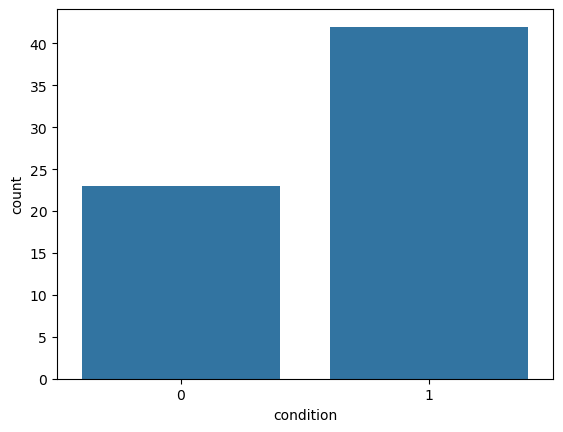

In [315]:
#visualization
sns.countplot(x='condition', data=df)

In [316]:
df['gender'].value_counts(sort=False)

gender
2.0    17
1.0    48
Name: count, dtype: int64

<Axes: xlabel='gender', ylabel='Count'>

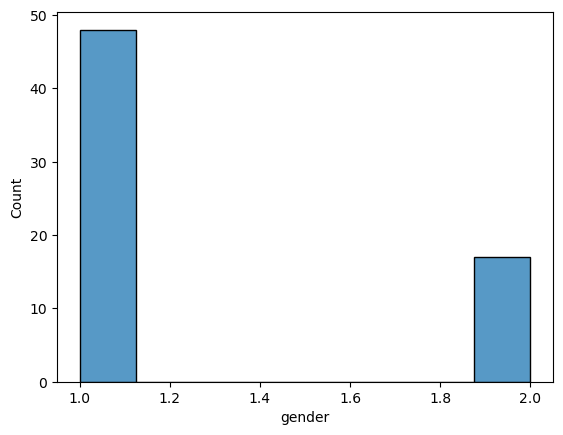

In [317]:
sns.histplot(x = 'gender', data = df)

In [318]:
df['age'].describe()

count    65.000000
mean     29.200000
std      16.685697
min      18.000000
25%      20.000000
50%      21.000000
75%      23.000000
max      74.000000
Name: age, dtype: float64

<Axes: xlabel='age', ylabel='Count'>

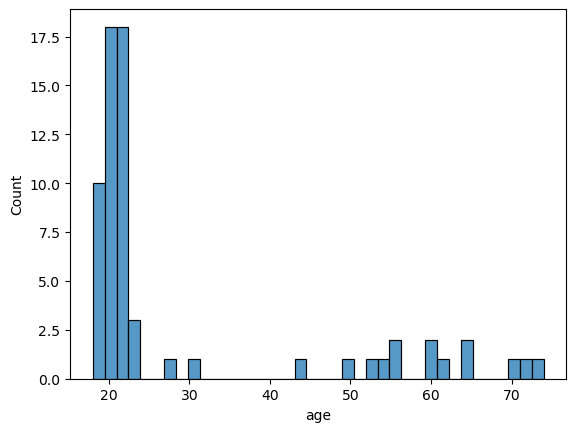

In [319]:
sns.histplot(x = 'age', data = df)

In [320]:
df['education'].describe()

count    65.000000
mean      2.846154
std       1.201962
min       1.000000
25%       2.000000
50%       2.000000
75%       4.000000
max       5.000000
Name: education, dtype: float64

<Axes: xlabel='education', ylabel='Count'>

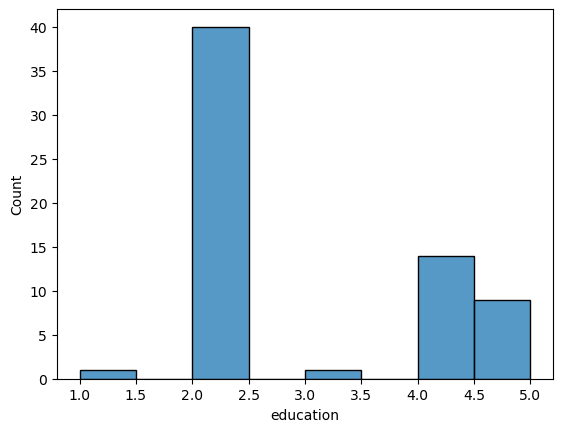

In [321]:
sns.histplot(x = 'education', data = df)

# Randomization check - should NOT be sig

## GENDER

In [322]:
#let's look at the crosstab
mycrosstab = pd.crosstab(df['gender'], df["condition"])
mycrosstab

condition,0,1
gender,,
1.0,15,33
2.0,8,9


In [323]:
# and then get the chi2 test for that table
c, p, dof, expected = contingency.chi2_contingency(mycrosstab)
print(f"𝜒²({dof:.0f}) = {c:.3f}, p = {p:.3f} ")

# maybe Cramer's V as well?
print(f"V = {contingency.association(mycrosstab,method='cramer'):.3f}")

𝜒²(1) = 0.768, p = 0.381 
V = 0.145


## EDUCATION

In [324]:
#let's look at the crosstab
mycrosstab = pd.crosstab(df['education'], df["condition"])
mycrosstab

condition,0,1
education,,
1.0,1,0
2.0,14,26
3.0,1,0
4.0,2,12
5.0,5,4


In [325]:
# and then get the chi2 test for that table
c, p, dof, expected = contingency.chi2_contingency(mycrosstab)
print(f"𝜒²({dof:.0f}) = {c:.3f}, p = {p:.3f} ")

# maybe Cramer's V as well?
print(f"V = {contingency.association(mycrosstab,method='cramer'):.3f}")

𝜒²(4) = 7.982, p = 0.092 
V = 0.350


## AGE

In [326]:
(label1, values1), (label2, values2) = df.groupby('condition')['age']

testresult = pg.ttest(values1, values2)

print(f"We compare {label1} (M={np.mean(values1):.2f}, SD={np.std(values1):.3f}) "
     f"with {label2} (M={np.mean(values2):.2f}, SD={np.std(values2):.3f}), "
     f"t({testresult.iloc[0,1]})={testresult.iloc[0,0]:.3f}, "
     f"p={testresult.iloc[0,3]:.4f}.")

testresult

We compare 0 (M=31.52, SD=18.443) with 1 (M=27.93, SD=15.277), t(38.38950800495643)=0.781, p=0.4395.


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.781223,38.389508,two-sided,0.439463,"[-5.71, 12.9]",0.214815,0.34,0.128983


# Control variables - Reading freq

In [327]:
(label1, values1), (label2, values2) = df.groupby('condition')['control(reading_habits)']

testresult = pg.ttest(values1, values2)

print(f"We compare {label1} (M={np.mean(values1):.2f}, SD={np.std(values1):.3f}) "
     f"with {label2} (M={np.mean(values2):.2f}, SD={np.std(values2):.3f}), "
     f"t({testresult.iloc[0,1]})={testresult.iloc[0,0]:.3f}, "
     f"p={testresult.iloc[0,3]:.4f}.")

testresult

We compare 0 (M=4.22, SD=1.768) with 1 (M=4.21, SD=1.641), t(42.192386366028295)=0.007, p=0.9946.


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.006813,42.192386,two-sided,0.994596,"[-0.92, 0.92]",0.001812,0.263,0.050005


# Control variables - Previous exp w/ RS

In [328]:
(label1, values1), (label2, values2) = df.groupby('condition')['control(previous_experience_with_RS)']

testresult = pg.ttest(values1, values2)

print(f"We compare {label1} (M={np.mean(values1):.2f}, SD={np.std(values1):.3f}) "
     f"with {label2} (M={np.mean(values2):.2f}, SD={np.std(values2):.3f}), "
     f"t({testresult.iloc[0,1]})={testresult.iloc[0,0]:.3f}, "
     f"p={testresult.iloc[0,3]:.4f}.")

testresult

We compare 0 (M=3.65, SD=1.991) with 1 (M=3.57, SD=1.941), t(44.0148213756047)=0.155, p=0.8777.


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.154768,44.014821,two-sided,0.877712,"[-0.97, 1.13]",0.040574,0.266,0.052723


# Manipulation check - mancheck1, mancheck2

MANIPULATION CHECK 1

In [329]:
#let's look at the crosstab
mycrosstab = pd.crosstab(df['condition'], df["mancheck1"])
mycrosstab

mancheck1,0.0,1.0
condition,,
0,11,12
1,8,34


In [330]:
# and then get the chi2 test for that table
c, p, dof, expected = contingency.chi2_contingency(mycrosstab)
print(f"𝜒²({dof:.0f}) = {c:.3f}, p = {p:.3f} ")

# maybe Cramer's V as well?
print(f"V = {contingency.association(mycrosstab,method='cramer'):.3f}")

𝜒²(1) = 4.640, p = 0.031 
V = 0.303


MANIPULATION CHECK 2

In [331]:
(label1, values1), (label2, values2) = df.groupby('condition')['mancheck2']

testresult = pg.ttest(values1, values2)

print(f"We compare {label1} (M={np.mean(values1):.2f}, SD={np.std(values1):.3f}) "
     f"with {label2} (M={np.mean(values2):.2f}, SD={np.std(values2):.3f}), "
     f"t({testresult.iloc[0,1]})={testresult.iloc[0,0]:.3f}, "
     f"p={testresult.iloc[0,3]:.4f}.")

testresult

We compare 0 (M=3.65, SD=1.902) with 1 (M=4.12, SD=1.815), t(43.21900774469187)=-0.944, p=0.3506.


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.943544,43.219008,two-sided,0.350648,"[-1.46, 0.53]",0.248922,0.382,0.156906


## Some recoding 

In [332]:
#conscientiousness_2
df['conscientiousness2_reverse'] = df['conscientiousness_2'].map({7:1, 6:2, 5:3, 4:4, 3:5, 2:6, 1:7})

In [333]:
#conscientiousness_3
df['conscientiousness3_reverse'] = df['conscientiousness_3'].map({7:1, 6:2, 5:3, 4:4, 3:5, 2:6, 1:7})

In [334]:
#motivation_10
df['motivation10_reverse'] = df['motivation_10'].map({7:1, 6:2, 5:3, 4:4, 3:5, 2:6, 1:7})

In [335]:
#motivation_11
df['motivation11_reverse'] = df['motivation_11'].map({7:1, 6:2, 5:3, 4:4, 3:5, 2:6, 1:7})

In [336]:
#checking if it worked
df['motivation11_reverse'].value_counts()

motivation11_reverse
6    14
5    13
4    12
7    11
2     9
1     4
3     2
Name: count, dtype: int64

In [337]:
df['motivation_11'].value_counts()

motivation_11
2.0    14
3.0    13
4.0    12
1.0    11
6.0     9
7.0     4
5.0     2
Name: count, dtype: int64

# Analysis 

## Check validity

## Enjoyment (DV) Factor Analysis

In [338]:
items = df[['motivation_8','motivation_9','motivation10_reverse','motivation11_reverse','motivation_12']]

#CHECK ADEQUACY
#Bartlett
#p-value should be 0 (statistically sig.)
chi_square_value,p_value=calculate_bartlett_sphericity(items)
print(chi_square_value, p_value)

#KMO
#Value should be 0.6<
kmo_all,kmo_model=calculate_kmo(items)
print(kmo_model)

164.64880219614372 3.549978059026786e-30
0.6015782989127093


In [339]:
# perform the factor analysis using the FactorAnalyzer class. You can specify the number of factors you want to extract using the n_factors parameter:
fa = FactorAnalyzer(n_factors = 1)

# fit the factor analysis model to your data
fa.fit(df[['motivation_8','motivation_9','motivation10_reverse','motivation11_reverse','motivation_12']])

/Users/alessiamoro/Library/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/factor_analyzer/factor_analyzer.py:663: UserWarning: No rotation will be performed when the number of factors equals 1.
  warnings.warn(


FactorAnalyzer(n_factors=1, rotation_kwargs={})

In [340]:
# Get the factor loadings
loadings = fa.loadings_

loadings

array([[-0.84618694],
       [-0.94893024],
       [-0.41483638],
       [-0.31865977],
       [-0.66946954]])

In [341]:
# Get the communalities
communalities = fa.get_communalities()
communalities

array([0.71603234, 0.90046859, 0.17208922, 0.10154405, 0.44818947])

In [342]:
# Get the eigenvalues
#         Returns
#         -------
#         original_eigen_values : :obj:`numpy.ndarray`
#             The original eigenvalues
#         common_factor_eigen_values : :obj:`numpy.ndarray`
#             The common factor eigenvalues
eigenvalues = fa.get_eigenvalues()

np.round(eigenvalues, decimals = 2)

array([[ 2.71,  1.33,  0.54,  0.31,  0.11],
       [ 2.34,  0.56,  0.04, -0.08, -0.52]])

In [343]:
# Get the variance explained by each factor;  
#         Returns
#         -------
#         variance : :obj:`numpy.ndarray`
#             The factor variances.
#         proportional_variance : :obj:`numpy.ndarray`
#             The proportional factor variances.
#         cumulative_variances : :obj:`numpy.ndarray`
#             The cumulative factor variances.
variance_explained = fa.get_factor_variance()

variance_explained

(array([2.33832367]), array([0.46766473]), array([0.46766473]))

In [344]:
# Check reliability (Cronbach's Alpha)

In [345]:
# Calculate the initial Cronbach's alpha
pg.cronbach_alpha(items)

(0.7731904909733499, array([0.673, 0.85 ]))

In [346]:
# calculate the alpha value without each item
alpha_deleted_items = []
for item in items.columns:
    reduced_data = items.drop(item, axis=1)
    alpha = pg.cronbach_alpha(reduced_data)
    alpha_deleted_items.append((item, alpha))

for item, alpha in alpha_deleted_items:
    print("Item removed:", item)
    print("Cronbach's alpha:", alpha)
    print()

Item removed: motivation_8
Cronbach's alpha: (0.6946285658172534, array([0.552, 0.8  ]))

Item removed: motivation_9
Cronbach's alpha: (0.6803669584203167, array([0.531, 0.791]))

Item removed: motivation10_reverse
Cronbach's alpha: (0.7490636704119851, array([0.632, 0.836]))

Item removed: motivation11_reverse
Cronbach's alpha: (0.7887256345648309, array([0.69 , 0.862]))

Item removed: motivation_12
Cronbach's alpha: (0.7354906030601018, array([0.612, 0.827]))



In [347]:
#If we are satisfied, maybe make a new variable by calculating the mean
df['dv_e'] = df[['motivation_8','motivation_9','motivation10_reverse','motivation_12']].mean(axis=1)   # of course, only select those you're interested in

<Axes: xlabel='dv_e', ylabel='Count'>

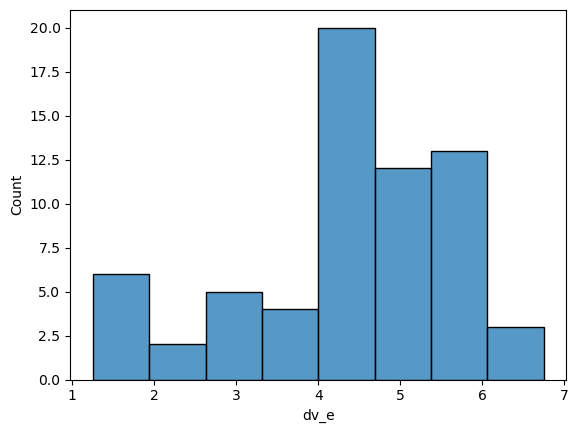

In [348]:
# visualization enjoyment
sns.histplot(x = 'dv_e', data=df)

## Conscientiousness (Mediator) Factor Analysis

In [349]:
items2 = df[['conscientiousness_1','conscientiousness2_reverse','conscientiousness3_reverse','conscientiousness_4','conscientiousness_5']]

#CHECK ADEQUACY
#Bartlett
#p-value should be 0 (statistically sig.)
chi_square_value,p_value=calculate_bartlett_sphericity(items2)
print(chi_square_value, p_value)

#KMO
#Value should be 0.6<
kmo_all,kmo_model=calculate_kmo(items2)
print(kmo_model)

65.7815713053044 2.871991095090997e-10
0.47501689910202055


In [350]:
# perform the factor analysis using the FactorAnalyzer class. You can specify the number of factors you want to extract using the n_factors parameter:
fa = FactorAnalyzer(n_factors = 1)

# fit the factor analysis model to your data
fa.fit(df[['conscientiousness_1','conscientiousness2_reverse','conscientiousness3_reverse','conscientiousness_4','conscientiousness_5']])

/Users/alessiamoro/Library/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/factor_analyzer/factor_analyzer.py:663: UserWarning: No rotation will be performed when the number of factors equals 1.
  warnings.warn(


FactorAnalyzer(n_factors=1, rotation_kwargs={})

In [351]:
# Get the factor loadings
loadings = fa.loadings_
loadings

array([[0.3946783 ],
       [0.23542706],
       [0.22352367],
       [0.47329993],
       [0.97760856]])

In [352]:
# Get the communalities
communalities = fa.get_communalities()
communalities

array([0.15577096, 0.0554259 , 0.04996283, 0.22401283, 0.9557185 ])

In [353]:
# Get the eigenvalues
#         Returns
#         -------
#         original_eigen_values : :obj:`numpy.ndarray`
#             The original eigenvalues
#         common_factor_eigen_values : :obj:`numpy.ndarray`
#             The common factor eigenvalues
eigenvalues = fa.get_eigenvalues()

np.round(eigenvalues, decimals = 2)

array([[ 1.87,  1.5 ,  0.85,  0.46,  0.31],
       [ 1.44,  0.6 ,  0.15, -0.22, -0.54]])

In [354]:
# Get the variance explained by each factor;  
#         Returns
#         -------
#         variance : :obj:`numpy.ndarray`
#             The factor variances.
#         proportional_variance : :obj:`numpy.ndarray`
#             The proportional factor variances.
#         cumulative_variances : :obj:`numpy.ndarray`
#             The cumulative factor variances.
variance_explained = fa.get_factor_variance()

variance_explained

(array([1.44089102]), array([0.2881782]), array([0.2881782]))

In [355]:
#Cronbach's Alpha

In [356]:
# Calculate the initial Cronbach's alpha
pg.cronbach_alpha(items2)

(0.5493483897379913, array([0.349, 0.702]))

In [357]:
# calculate the alpha value without each item
alpha_deleted_items = []
for item in items2.columns:
    reduced_data = items2.drop(item, axis=1)
    alpha = pg.cronbach_alpha(reduced_data)
    alpha_deleted_items.append((item, alpha))

for item, alpha in alpha_deleted_items:
    print("Item removed:", item)
    print("Cronbach's alpha:", alpha)
    print()

Item removed: conscientiousness_1
Cronbach's alpha: (0.5084099041961864, array([0.279, 0.678]))

Item removed: conscientiousness2_reverse
Cronbach's alpha: (0.5283721775475898, array([0.309, 0.691]))

Item removed: conscientiousness3_reverse
Cronbach's alpha: (0.46082731946606315, array([0.21 , 0.647]))

Item removed: conscientiousness_4
Cronbach's alpha: (0.5591231890049517, array([0.354, 0.711]))

Item removed: conscientiousness_5
Cronbach's alpha: (0.396962003055583, array([0.116, 0.605]))



In [358]:
#If we are satisfied, maybe make a new variable by calculating the mean
df['dv_c'] = df[['conscientiousness_1','conscientiousness2_reverse','conscientiousness3_reverse','conscientiousness_4','conscientiousness_5']].mean(axis=1)   # of course, only select those you're interested in

<Axes: xlabel='dv_c', ylabel='Count'>

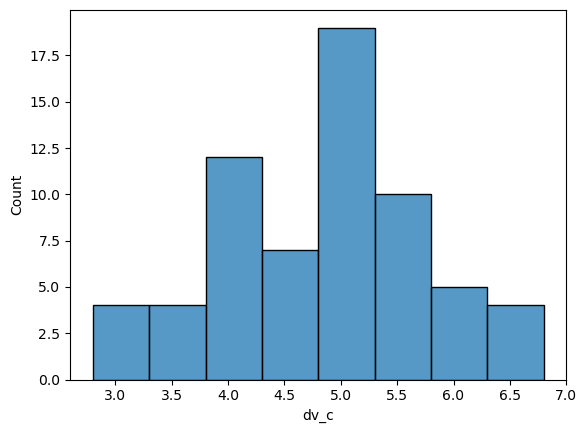

In [359]:
#visualization conscientiousness
sns.histplot(x = 'dv_c', data=df)

# T-test

Hypothesis 1: Participants experiencing no delay in the recommender system's response will report higher enjoyment compared to those experiencing a delay.

You only need to specify the variable you group by (gender) and the variable you want to test (dv) in the first line of the code and we'll print a nicely formated sentence! (plus the table)

In [360]:
(label1, values1), (label2, values2) = df.groupby('condition')['dv_e']

testresult = pg.ttest(values1, values2)

print(f"We compare {label1} (M={np.mean(values1):.2f}, SD={np.std(values1):.3f}) "
     f"with {label2} (M={np.mean(values2):.2f}, SD={np.std(values2):.3f}), "
     f"t({testresult.iloc[0,1]})={testresult.iloc[0,0]:.3f}, "
     f"p={testresult.iloc[0,3]:.4f}.")

testresult

We compare 0 (M=4.52, SD=1.168) with 1 (M=4.23, SD=1.422), t(52.94915784558725)=0.868, p=0.3893.


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.868045,52.949158,two-sided,0.389287,"[-0.38, 0.96]",0.213155,0.361,0.127735


# Mediation Analysis

Hypothesis 2: The influence of response latency on users' enjoyment will be mediated by their level of conscientiousness, with higher conscientiousness amplifying the effect of no delay on enjoyment.

Let's assume that we want to recode `x1, x2, ... x5` from the dataframe above into `some_mediator` (see Cronbach's alpha above) and test the model `age --> some_mediator --> dv`:

In [361]:
df['dv_c'] = df[['conscientiousness_1','conscientiousness2_reverse','conscientiousness3_reverse','conscientiousness_4','conscientiousness_5']].mean(axis=1) 

In [362]:
pg.mediation_analysis(data=df, x='age', m='dv_c', y='dv_e', seed=42, n_boot=1000)

,path,coef,se,pval,CI[2.5%],CI[97.5%],sig
0,dv_c ~ X,0.012306,0.006768,0.073759,-0.001218,0.025831,No
1,Y ~ dv_c,0.124721,0.185010,0.502693,-0.244992,0.494434,No
2,Total,0.009086,0.010168,0.374946,-0.011233,0.029406,No
3,Direct,0.007948,0.010495,0.451774,-0.013033,0.028928,No
4,Indirect,0.001139,0.002879,0.638000,-0.003524,0.007611,No
